# Model training

In [101]:
import pandas as pd
import tqdm
import numpy as np

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, plot_roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

In [12]:
train = pd.read_csv("./data/processed_train.csv")
test = pd.read_csv("./data/processed_test.csv")

In [13]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190_unique,var_191_unique,var_192_unique,var_193_unique,var_194_unique,var_195_unique,var_196_unique,var_197_unique,var_198_unique,var_199_unique
0,train_0,0.0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,0,0,0,0,0,0,0,0,0,0
1,train_1,0.0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,0,0,0,0,0,0,0,0,0,0
2,train_2,0.0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,0,0,0,0,0,0,0,0,0,0
3,train_3,0.0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,0,0,0,0,0,0,0,0,0,0
4,train_4,0.0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,0,0,1,1,1,0,0,0,0,0


In [14]:
# Labels
y = train['target']

# Features
X = train.drop(['ID_code', 'target'], axis=1)

# Split data to train and test set
X_train, X_test, y_train, y_test = \
    train_test_split(X.values, y, test_size=0.15, random_state=42)

In [42]:
from functools import wraps
from time import time
def measure(func):
    @wraps(func)
    def _time_it(*args, **kwargs):
        start = int(round(time() * 1000))
        try:
            return func(*args, **kwargs)
        finally:
            end_ = int(round(time() * 1000)) - start
            print(f"Total execution time: {end_ if end_ > 0 else 0} ms")
    return _time_it

In [83]:
lr = LogisticRegression(solver='saga')
lr.fit(X_train[0:100000, 0:400], y_train[0:100000])

C:\Users\LONAA32\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='saga')

In [84]:
predictions = lr.predict(X_test)

In [85]:
f1_score(y_test, predictions)

0.37523719165085384

In [86]:
y_test

119737    0.0
72272     0.0
158154    0.0
65426     0.0
30074     1.0
         ... 
137380    0.0
95076     0.0
169910    0.0
14572     0.0
56737     1.0
Name: target, Length: 30000, dtype: float64

In [87]:
predictions.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [88]:
roc_auc_score(y_test, predictions)

0.6224979969366062

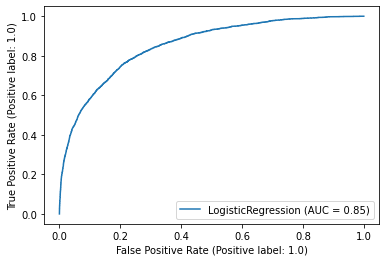

In [94]:
plot_roc_curve(lr, X_test, y_test)  
plt.show() 

In [95]:
rf = RandomForestClassifier()
rf.fit(X_train[0:100000, 0:400], y_train[0:100000])

RandomForestClassifier()

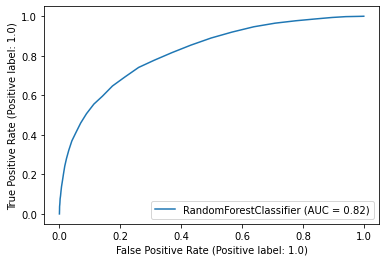

In [96]:
plot_roc_curve(rf, X_test, y_test)  
plt.show() 

In [97]:
predictions = rf.predict(X_test)
roc_auc_score(y_test, predictions)

0.5

In [100]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([152961,  17039], dtype=int64))

In [115]:
X_train_tmp = X_train[0:100, 0:400]
y_train_tmp = y_train[0:100].to_numpy()

In [129]:
print(X_train_tmp.shape)
print(y_train_tmp.shape)

(100, 400)
(100,)


In [166]:
X_train_tmp

array([[10.0577,  6.098 ,  9.9685, ...,  0.    ,  1.    ,  0.    ],
       [ 8.8189, -0.0166, 12.789 , ...,  0.    ,  0.    ,  0.    ],
       [10.4661,  0.7115,  7.7644, ...,  0.    ,  0.    ,  1.    ],
       ...,
       [ 6.6701, -6.3918, 12.1324, ...,  0.    ,  0.    ,  1.    ],
       [13.8119, -8.0017,  8.5631, ...,  0.    ,  0.    ,  0.    ],
       [ 6.5481, -7.0744, 10.8743, ...,  0.    ,  0.    ,  0.    ]])

In [167]:
X_train_tmp.T

array([[10.0577,  8.8189, 10.4661, ...,  6.6701, 13.8119,  6.5481],
       [ 6.098 , -0.0166,  0.7115, ..., -6.3918, -8.0017, -7.0744],
       [ 9.9685, 12.789 ,  7.7644, ..., 12.1324,  8.5631, 10.8743],
       ...,
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    ,  0.    ]])

In [118]:
X_train_reshaped = X_train_tmp.reshape(-1, 1)
y_train_reshaped = y_train_tmp.reshape(-1, 1)

In [131]:
print(X_train_reshaped.shape)
print(y_train_reshaped.shape)

(40000, 1)
(100, 1)


In [125]:
BATCH_SIZE = 100
FEATURES = 400

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation="relu", input_shape=(1,)))
model.add(tf.keras.layers.Reshape((BATCH_SIZE, FEATURES*16)))
model.add(tf.keras.layers.Dense(1, activation="relu"))
    
# Compile model
model.compile(loss="binary_crossentropy", optimizer="adadelta", metrics=["accuracy"])

In [130]:
history = model.fit(X_train_reshaped, y_train_tmp, epochs=10000, verbose=0)

ValueError: Data cardinality is ambiguous:
  x sizes: 40000
  y sizes: 100
Please provide data which shares the same first dimension.

In [135]:
num_data

array([[0.8085511 , 0.54684189, 0.77576334],
       [0.41453383, 0.30320034, 0.55979671],
       [0.20678307, 0.73509279, 0.46930241],
       [0.85956252, 0.0883106 , 0.20643969],
       [0.18562125, 0.95566252, 0.9492431 ],
       [0.46686796, 0.21797507, 0.89129886],
       [0.06296475, 0.63466547, 0.21941969],
       [0.11316783, 0.01743828, 0.97900879],
       [0.42971123, 0.55681159, 0.54605464],
       [0.6463018 , 0.40484888, 0.70299229]])

In [136]:
cat_data

array([3, 1, 3, 0, 3, 2, 3, 1, 1, 1])

In [137]:
one_hot_encoded_cat_data

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [138]:
target

array([[0.14675451],
       [0.98364103],
       [0.49721776],
       [0.59491285],
       [0.721801  ],
       [0.57122603],
       [0.14183869],
       [0.37451603],
       [0.11568267],
       [0.53800028]])

In [160]:
emb

<tf.Tensor 'embedding_8/Identity:0' shape=(None, 4, 2) dtype=float32>

In [161]:
flatten

<tf.Tensor 'flatten_2/Identity:0' shape=(None, 8) dtype=float32>

# How to use embedding layer with categorical data

In [157]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

BATCH_SIZE = 10

#Three numerical variables
num_data = np.random.random(size=(BATCH_SIZE, 3))

#One categorical variables with 4 levels
cat_data = np.random.randint(0, 4, BATCH_SIZE)

#Let's create one-hot encoded matrix since expected input_1 to have shape (4,)
one_hot_encoded_cat_data = np.eye(cat_data.max()+1)[cat_data]

target =  np.random.random(size=(BATCH_SIZE, 1))

no_of_unique_cat  = len(np.unique(cat_data))  #4 categories
#Jeremy Howard provides the following rule of thumb; embedding size = min(50, number of categories/2).
embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )  #embedding size is 2
embedding_size = int(embedding_size)

# Use Input layers, specify input shape (dimensions except first)
inp_cat_data = keras.layers.Input(shape=(no_of_unique_cat,))  #4 categories
inp_num_data = keras.layers.Input(shape=(num_data.shape[1],))  #3 variables

# Bind nulti_hot to embedding layer
emb = keras.layers.Embedding(input_dim=no_of_unique_cat, output_dim=embedding_size)(inp_cat_data) 
# Also you need flatten embedded output of shape (?, 4, 2) to (?, 8) -
# otherwise it's not possible to concatenate it with inp_num_data
flatten = keras.layers.Flatten()(emb)

# Concatenate two layers
conc = keras.layers.Concatenate()([flatten, inp_num_data])
dense1 = keras.layers.Dense(3, activation=tf.nn.relu, )(conc)
# Creating output layer
out = keras.layers.Dense(1, activation=None)(dense1)
model = keras.Model(inputs=[inp_cat_data, inp_num_data], outputs=out)

model.compile(optimizer="adam",
              loss=keras.losses.mean_squared_error,
              metrics=[keras.metrics.mean_squared_error])

In [134]:
model.fit([one_hot_encoded_cat_data, num_data], target)
# WARNING:tensorflow:From /anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
# Instructions for updating:
# Use tf.cast instead.
# 10/10 [==============================] - 0s 13ms/sample - loss: 0.1767 - mean_squared_error: 0.1767
# <tensorflow.python.keras.callbacks.History at 0xb2ff1efd0>
model.layers[1].get_weights()[0]
# array([[0.03832028, 0.01142023],
#        [0.0013773 , 0.05999473],
#        [0.04026476, 0.04118952],
#        [0.03986621, 0.0390432 ]], dtype=float32)

1/1 [==============================] - 0s 1ms/step - loss: 0.2208 - mean_squared_error: 0.2208


array([[ 0.00043891, -0.00896747],
       [ 0.01212736, -0.02333974],
       [ 0.04813469, -0.00676714],
       [ 0.04185874,  0.01263851]], dtype=float32)